# Get Data from API

In [1]:
import requests
import pandas as pd
from prefect import flow, task, get_run_logger
%pip install nbformat

Note: you may need to restart the kernel to use updated packages.


In [2]:
base_url = "http://air4thai.pcd.go.th"
path = "/services/getNewAQI_JSON.php"

In [3]:
#logger = get_run_logger()
response = requests.get(url=base_url+path)
response.raise_for_status()
AQI_stats = response.json()
data = AQI_stats['stations']
print(data)
#logger.info(AQI_stats)

[{'stationID': '02t', 'nameTH': 'มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา', 'nameEN': 'Bansomdejchaopraya Rajabhat University', 'areaTH': 'แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ', 'areaEN': 'Hiran Ruchi, Khet Thon Buri, Bangkok', 'stationType': 'GROUND', 'lat': '13.732846', 'long': '100.487662', 'forecast': [], 'AQILast': {'date': '2025-05-15', 'time': '09:00', 'PM25': {'color_id': '1', 'aqi': '25', 'value': '14.9'}, 'PM10': {'color_id': '0', 'aqi': '-1', 'value': '-1'}, 'O3': {'color_id': '0', 'aqi': '-1', 'value': '-1'}, 'CO': {'color_id': '0', 'aqi': '-1', 'value': '-1'}, 'NO2': {'color_id': '0', 'aqi': '-1', 'value': '-1'}, 'SO2': {'color_id': '0', 'aqi': '-1', 'value': '-1'}, 'AQI': {'color_id': '1', 'aqi': '25', 'param': 'PM25'}}}, {'stationID': '03t', 'nameTH': 'ริมถนนทางหลวงหมายเลข 3902 ', 'nameEN': 'Highway NO.3902 km.13 +600', 'areaTH': 'ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ', 'areaEN': 'Kanchanaphisek Rd, Bang Khun Thian, Bangkok', 'stationType': 'GROUND', 'lat': '13.636514', 'l

In [4]:
df = pd.DataFrame(data)
df.head()

,stationID,nameTH,nameEN,areaTH,areaEN,stationType,lat,long,forecast,AQILast
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'..."
1,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,[],"{'date': '2025-05-15', 'time': '07:00', 'PM25'..."
2,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.77553,100.569195,[],"{'date': '2025-05-02', 'time': '12:00', 'PM25'..."
3,12t,โรงเรียนนนทรีวิทยา,Nonsi Witthaya School,"แขวงช่องนนทรี เขตยานนาวา, กรุงเทพฯ","Chong Nonsi, Khet Yannawa, Bangkok",GROUND,13.70806667,100.5473333,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'..."
4,50t,โรงพยาบาลจุฬาลงกรณ์,Chulalongkorn Hospital,"ริมถนนพระราม 4 เขตปทุมวัน, กรุงเทพฯ","Rama IV Rd. Khet Pathum Wan, Bangkok",GROUND,13.729852,100.536501,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   stationID    187 non-null    object
 1   nameTH       187 non-null    object
 2   nameEN       187 non-null    object
 3   areaTH       187 non-null    object
 4   areaEN       187 non-null    object
 5   stationType  187 non-null    object
 6   lat          187 non-null    object
 7   long         187 non-null    object
 8   forecast     187 non-null    object
 9   AQILast      187 non-null    object
dtypes: object(10)
memory usage: 14.7+ KB


In [6]:
expanded_aqi = pd.json_normalize(df['AQILast'])
expanded_aqi

,date,time,PM25.color_id,PM25.aqi,PM25.value,PM10.color_id,PM10.aqi,PM10.value,O3.color_id,O3.aqi,...,CO.value,NO2.color_id,NO2.aqi,NO2.value,SO2.color_id,SO2.aqi,SO2.value,AQI.color_id,AQI.aqi,AQI.param
0,2025-05-15,09:00,1,25,14.9,0,-1,-1,0,-1,...,-1,0,-1,-1,0,-1,-1,1,25,PM25
1,2025-05-15,07:00,2,28,16.1,0,-1,-1,0,-1,...,-1,0,-1,-1,0,-999,-1,2,28,PM25
2,2025-05-02,12:00,3,53,25.5,0,-1,-1,0,-1,...,-1,0,-1,-1,0,-1,-1,-3,53,PM25
3,2025-05-15,09:00,2,26,15.2,0,-1,-1,0,-1,...,-1,0,-1,-1,0,-1,-1,2,26,PM25
4,2025-05-15,09:00,2,31,17.0,0,-1,-1,0,-999,...,-1,0,-1,-1,0,-999,-1,2,31,PM25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2025-05-15,09:00,1,14,8.1,1,11,22,1,11,...,0.80,1,0,1,0,-1,-1,1,14,PM25
183,2025-05-15,09:00,1,20,11.8,0,-1,-1,0,-1,...,-1,0,-1,-1,0,-1,-1,1,20,PM25
184,2025-05-15,09:00,1,9,5.5,1,4,8,0,-1,...,-1,0,-1,-1,0,-999,-1,1,9,PM25
185,2025-05-15,09:00,1,13,7.6,0,-999,-1,0,-999,...,-1,0,-999,-1,0,-999,-1,1,13,PM25


In [7]:
df = pd.concat([df, expanded_aqi], axis=1)
df

,stationID,nameTH,nameEN,areaTH,areaEN,stationType,lat,long,forecast,AQILast,...,CO.value,NO2.color_id,NO2.aqi,NO2.value,SO2.color_id,SO2.aqi,SO2.value,AQI.color_id,AQI.aqi,AQI.param
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,0,-1,-1,0,-1,-1,1,25,PM25
1,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,[],"{'date': '2025-05-15', 'time': '07:00', 'PM25'...",...,-1,0,-1,-1,0,-999,-1,2,28,PM25
2,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.77553,100.569195,[],"{'date': '2025-05-02', 'time': '12:00', 'PM25'...",...,-1,0,-1,-1,0,-1,-1,-3,53,PM25
3,12t,โรงเรียนนนทรีวิทยา,Nonsi Witthaya School,"แขวงช่องนนทรี เขตยานนาวา, กรุงเทพฯ","Chong Nonsi, Khet Yannawa, Bangkok",GROUND,13.70806667,100.5473333,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,0,-1,-1,0,-1,-1,2,26,PM25
4,50t,โรงพยาบาลจุฬาลงกรณ์,Chulalongkorn Hospital,"ริมถนนพระราม 4 เขตปทุมวัน, กรุงเทพฯ","Rama IV Rd. Khet Pathum Wan, Bangkok",GROUND,13.729852,100.536501,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,0,-1,-1,0,-999,-1,2,31,PM25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,72t,สวนสาธารณะเฉลิมพระเกียรติ 60 พรรษามหาราชินี จั...,"60th Anniversary Queen Sirikit Public Park, Loei","ต.กุดป่อง อ.เมือง, เลย","Kut Pong Subdistrict, Mueang District, Loei",GROUND,17.48462,101.732734,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,0.80,1,0,1,0,-1,-1,1,14,PM25
183,69t,อุตุนิยมวิทยาจังหวัดแพร่,"Meteorology Center, Phrae","ต.นาจักร อ.เมือง, แพร่","Na Chak, Meuang, Phrae",GROUND,18.1283666,100.1624333,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,0,-1,-1,0,-1,-1,1,20,PM25
184,58t,สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดแ...,"Natural Resources and Environment Office, Mae ...","ต.จองคำ อ.เมือง, แม่ฮ่องสอน","Chong Kham, Meuang, Mae Hong Son",GROUND,19.30455,97.97165,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,0,-1,-1,0,-999,-1,1,9,PM25
185,o24,เทศบาลตำบลปาย,Pai Municipality,"ต.เวียงใต้ อ.ปาย, แม่ฮ่องสอน","Pai, Pai, Mae Hong Son",MOBILE,19.3591522,98.4364794,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,0,-999,-1,0,-999,-1,1,13,PM25


In [8]:
df['time'] = df['time'].mode()[0]
df['date'] = df['date'].mode()[0]
df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'])
df[['year', 'month', 'day', 'hour']] = df['timestamp'].apply(
    lambda ts: pd.Series([ts.year, ts.month, ts.day, ts.hour])
)
df[['PM25.color_id', 'PM25.aqi']] = df[['PM25.color_id', 'PM25.aqi']].astype(int)

In [9]:
df

,stationID,nameTH,nameEN,areaTH,areaEN,stationType,lat,long,forecast,AQILast,...,SO2.aqi,SO2.value,AQI.color_id,AQI.aqi,AQI.param,timestamp,year,month,day,hour
0,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,-1,1,25,PM25,2025-05-15 09:00:00,2025,5,15,9
1,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,[],"{'date': '2025-05-15', 'time': '07:00', 'PM25'...",...,-999,-1,2,28,PM25,2025-05-15 09:00:00,2025,5,15,9
2,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.77553,100.569195,[],"{'date': '2025-05-02', 'time': '12:00', 'PM25'...",...,-1,-1,-3,53,PM25,2025-05-15 09:00:00,2025,5,15,9
3,12t,โรงเรียนนนทรีวิทยา,Nonsi Witthaya School,"แขวงช่องนนทรี เขตยานนาวา, กรุงเทพฯ","Chong Nonsi, Khet Yannawa, Bangkok",GROUND,13.70806667,100.5473333,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,-1,2,26,PM25,2025-05-15 09:00:00,2025,5,15,9
4,50t,โรงพยาบาลจุฬาลงกรณ์,Chulalongkorn Hospital,"ริมถนนพระราม 4 เขตปทุมวัน, กรุงเทพฯ","Rama IV Rd. Khet Pathum Wan, Bangkok",GROUND,13.729852,100.536501,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-999,-1,2,31,PM25,2025-05-15 09:00:00,2025,5,15,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,72t,สวนสาธารณะเฉลิมพระเกียรติ 60 พรรษามหาราชินี จั...,"60th Anniversary Queen Sirikit Public Park, Loei","ต.กุดป่อง อ.เมือง, เลย","Kut Pong Subdistrict, Mueang District, Loei",GROUND,17.48462,101.732734,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,-1,1,14,PM25,2025-05-15 09:00:00,2025,5,15,9
183,69t,อุตุนิยมวิทยาจังหวัดแพร่,"Meteorology Center, Phrae","ต.นาจักร อ.เมือง, แพร่","Na Chak, Meuang, Phrae",GROUND,18.1283666,100.1624333,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-1,-1,1,20,PM25,2025-05-15 09:00:00,2025,5,15,9
184,58t,สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดแ...,"Natural Resources and Environment Office, Mae ...","ต.จองคำ อ.เมือง, แม่ฮ่องสอน","Chong Kham, Meuang, Mae Hong Son",GROUND,19.30455,97.97165,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-999,-1,1,9,PM25,2025-05-15 09:00:00,2025,5,15,9
185,o24,เทศบาลตำบลปาย,Pai Municipality,"ต.เวียงใต้ อ.ปาย, แม่ฮ่องสอน","Pai, Pai, Mae Hong Son",MOBILE,19.3591522,98.4364794,[],"{'date': '2025-05-15', 'time': '09:00', 'PM25'...",...,-999,-1,1,13,PM25,2025-05-15 09:00:00,2025,5,15,9


In [10]:
df[[
        'timestamp', 'year', 'month', 'day', 'hour',
        'stationID', 'nameTH', 'nameEN', 'areaTH', 'areaEN',
        'stationType', 'lat', 'long',
        'PM25.color_id', 'PM25.aqi'
]]

,timestamp,year,month,day,hour,stationID,nameTH,nameEN,areaTH,areaEN,stationType,lat,long,PM25.color_id,PM25.aqi
0,2025-05-15 09:00:00,2025,5,15,9,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,1,25
1,2025-05-15 09:00:00,2025,5,15,9,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,2,28
2,2025-05-15 09:00:00,2025,5,15,9,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.77553,100.569195,3,53
3,2025-05-15 09:00:00,2025,5,15,9,12t,โรงเรียนนนทรีวิทยา,Nonsi Witthaya School,"แขวงช่องนนทรี เขตยานนาวา, กรุงเทพฯ","Chong Nonsi, Khet Yannawa, Bangkok",GROUND,13.70806667,100.5473333,2,26
4,2025-05-15 09:00:00,2025,5,15,9,50t,โรงพยาบาลจุฬาลงกรณ์,Chulalongkorn Hospital,"ริมถนนพระราม 4 เขตปทุมวัน, กรุงเทพฯ","Rama IV Rd. Khet Pathum Wan, Bangkok",GROUND,13.729852,100.536501,2,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,2025-05-15 09:00:00,2025,5,15,9,72t,สวนสาธารณะเฉลิมพระเกียรติ 60 พรรษามหาราชินี จั...,"60th Anniversary Queen Sirikit Public Park, Loei","ต.กุดป่อง อ.เมือง, เลย","Kut Pong Subdistrict, Mueang District, Loei",GROUND,17.48462,101.732734,1,14
183,2025-05-15 09:00:00,2025,5,15,9,69t,อุตุนิยมวิทยาจังหวัดแพร่,"Meteorology Center, Phrae","ต.นาจักร อ.เมือง, แพร่","Na Chak, Meuang, Phrae",GROUND,18.1283666,100.1624333,1,20
184,2025-05-15 09:00:00,2025,5,15,9,58t,สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดแ...,"Natural Resources and Environment Office, Mae ...","ต.จองคำ อ.เมือง, แม่ฮ่องสอน","Chong Kham, Meuang, Mae Hong Son",GROUND,19.30455,97.97165,1,9
185,2025-05-15 09:00:00,2025,5,15,9,o24,เทศบาลตำบลปาย,Pai Municipality,"ต.เวียงใต้ อ.ปาย, แม่ฮ่องสอน","Pai, Pai, Mae Hong Son",MOBILE,19.3591522,98.4364794,1,13


# Test Session

In [11]:
import os
import pandas as pd
import json
import pyarrow.parquet as pq
import s3fs

# Set lakeFS endpoint
# Set access key and secret key for lakeFS
lakefs_endpoint = os.getenv("LAKEFS_ENDPOINT", "http://localhost:8001")
ACCESS_KEY = os.getenv("LAKEFS_ACCESS_KEY", "access_key")
SECRET_KEY = os.getenv("LAKEFS_SECRET_KEY", "secret_key")

# Create s3fs file system object
fs = s3fs.S3FileSystem(
    key=ACCESS_KEY,
    secret=SECRET_KEY,
    client_kwargs={'endpoint_url': lakefs_endpoint}
)

In [12]:
lake_path = "s3://air-quality/main/airquality.parquet/year=2025"
data_list = fs.glob(f"{lake_path}/*/*/*/*")
len(data_list)

110

In [13]:
df_all = pd.concat([pd.read_parquet(f"s3://{path}", filesystem=fs) for path in data_list], ignore_index=True)
df_all

,timestamp,stationID,nameTH,nameEN,areaTH,areaEN,stationType,lat,long,PM25.color_id,PM25.aqi,year,month,day,hour
0,2025-05-10 20:00:00,02t,มหาวิทยาลัยราชภัฏบ้านสมเด็จเจ้าพระยา,Bansomdejchaopraya Rajabhat University,"แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ","Hiran Ruchi, Khet Thon Buri, Bangkok",GROUND,13.732846,100.487662,2,26,2025,5,10,20
1,2025-05-10 20:00:00,03t,ริมถนนทางหลวงหมายเลข 3902,Highway NO.3902 km.13 +600,"ริมถนนกาญจนาภิเษก เขตบางขุนเทียน, กรุงเทพฯ","Kanchanaphisek Rd, Bang Khun Thian, Bangkok",GROUND,13.636514,100.414262,2,29,2025,5,10,20
2,2025-05-10 20:00:00,11t,การเคหะชุมชนห้วยขวาง,National Housing Huaykwang,"แขวงดินแดง เขตดินแดง, กรุงเทพฯ","Din Daeng, Khet Din Daeng, Bangkok",GROUND,13.77553,100.569195,3,53,2025,5,10,20
3,2025-05-10 20:00:00,12t,โรงเรียนนนทรีวิทยา,Nonsi Witthaya School,"แขวงช่องนนทรี เขตยานนาวา, กรุงเทพฯ","Chong Nonsi, Khet Yannawa, Bangkok",GROUND,13.70806667,100.5473333,2,26,2025,5,10,20
4,2025-05-10 20:00:00,50t,โรงพยาบาลจุฬาลงกรณ์,Chulalongkorn Hospital,"ริมถนนพระราม 4 เขตปทุมวัน, กรุงเทพฯ","Rama IV Rd. Khet Pathum Wan, Bangkok",GROUND,13.729852,100.536501,2,31,2025,5,10,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20547,2025-05-08 00:00:00,72t,สวนสาธารณะเฉลิมพระเกียรติ 60 พรรษามหาราชินี จั...,"60th Anniversary Queen Sirikit Public Park, Loei","ต.กุดป่อง อ.เมือง, เลย","Kut Pong Subdistrict, Mueang District, Loei",GROUND,17.48462,101.732734,2,42,2025,5,8,0
20548,2025-05-08 00:00:00,69t,อุตุนิยมวิทยาจังหวัดแพร่,"Meteorology Center, Phrae","ต.นาจักร อ.เมือง, แพร่","Na Chak, Meuang, Phrae",GROUND,18.1283666,100.1624333,3,54,2025,5,8,0
20549,2025-05-08 00:00:00,58t,สำนักงานทรัพยากรธรรมชาติและสิ่งแวดล้อมจังหวัดแ...,"Natural Resources and Environment Office, Mae ...","ต.จองคำ อ.เมือง, แม่ฮ่องสอน","Chong Kham, Meuang, Mae Hong Son",GROUND,19.30455,97.97165,3,82,2025,5,8,0
20550,2025-05-08 00:00:00,o24,เทศบาลตำบลปาย,Pai Municipality,"ต.เวียงใต้ อ.ปาย, แม่ฮ่องสอน","Pai, Pai, Mae Hong Son",MOBILE,19.3591522,98.4364794,3,65,2025,5,8,0


In [14]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20552 entries, 0 to 20551
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      20552 non-null  datetime64[ns]
 1   stationID      20552 non-null  object        
 2   nameTH         20552 non-null  object        
 3   nameEN         20552 non-null  object        
 4   areaTH         20552 non-null  object        
 5   areaEN         20552 non-null  object        
 6   stationType    20552 non-null  object        
 7   lat            20552 non-null  object        
 8   long           20552 non-null  object        
 9   PM25.color_id  20552 non-null  int64         
 10  PM25.aqi       20552 non-null  int64         
 11  year           20552 non-null  category      
 12  month          20552 non-null  category      
 13  day            20552 non-null  int32         
 14  hour           20552 non-null  int32         
dtypes: category(2), dat

In [15]:
df_all['lat'] = pd.to_numeric(df_all['lat'], errors='coerce')
df_all['long'] = pd.to_numeric(df_all['long'], errors='coerce')
df_all['year'] = df_all['year'].astype(int) 
df_all['month'] = df_all['month'].astype(int)
columns_to_convert = ['stationID', 'nameTH', 'nameEN', 'areaTH', 'areaEN', 'stationType']
for col in columns_to_convert:
    df_all[col] = df_all[col].astype(pd.StringDtype())
df_all.drop_duplicates(inplace=True)

In [16]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18323 entries, 0 to 20551
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      18323 non-null  datetime64[ns]
 1   stationID      18323 non-null  string        
 2   nameTH         18323 non-null  string        
 3   nameEN         18323 non-null  string        
 4   areaTH         18323 non-null  string        
 5   areaEN         18323 non-null  string        
 6   stationType    18323 non-null  string        
 7   lat            18323 non-null  float64       
 8   long           18323 non-null  float64       
 9   PM25.color_id  18323 non-null  int64         
 10  PM25.aqi       18323 non-null  int64         
 11  year           18323 non-null  int64         
 12  month          18323 non-null  int64         
 13  day            18323 non-null  int32         
 14  hour           18323 non-null  int32         
dtypes: datetime64[ns](1), fl

In [17]:
df_all.describe()

,timestamp,lat,long,PM25.color_id,PM25.aqi,year,month,day,hour
count,18323,18323.000000,18323.000000,18323.000000,18323.000000,18323.0,18323.0,18323.000000,18323.000000
mean,2025-05-13 02:30:46.466190080,14.253418,100.697204,1.481471,25.914970,2025.0,5.0,12.641107,11.126344
min,2025-05-07 23:00:00,5.763873,97.932710,0.000000,-9999.000000,2025.0,5.0,7.000000,0.000000
25%,2025-05-12 03:00:00,13.682136,100.327269,1.000000,17.000000,2025.0,5.0,12.000000,4.000000
50%,2025-05-13 04:00:00,13.776664,100.544838,1.000000,23.000000,2025.0,5.0,13.000000,10.000000
75%,2025-05-14 06:00:00,15.173056,100.780708,2.000000,33.000000,2025.0,5.0,14.000000,18.000000
max,2025-05-15 08:00:00,20.427325,104.846219,4.000000,157.000000,2025.0,5.0,15.000000,23.000000
std,NaN,2.694278,1.208137,0.615560,75.410411,0.0,0.0,1.499553,7.574649


In [18]:
# Change values ​​less than 0 to NaN only in the PM25.aqi column
df_all['PM25.aqi'] = df_all['PM25.aqi'].mask(df_all['PM25.aqi'] < 0, pd.NA)

# Populate values ​​from "previous" values ​​by grouping by stationID
df_all['PM25.aqi'] = df_all.groupby('stationID')['PM25.aqi'].transform(lambda x: x.fillna(method='ffill'))

/var/folders/g_/rkb_y7md1l3_n6c7w4h23df00000gp/T/ipykernel_73019/690819333.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_all['PM25.aqi'] = df_all.groupby('stationID')['PM25.aqi'].transform(lambda x: x.fillna(method='ffill'))


In [19]:
daily_aqi = df_all.groupby('day')['PM25.aqi'].mean().reset_index()
daily_aqi

,day,PM25.aqi
0,7,29.705882
1,8,29.379679
2,10,30.686275
3,11,29.933583
4,12,27.192959
5,13,26.485173
6,14,24.558429
7,15,22.198327


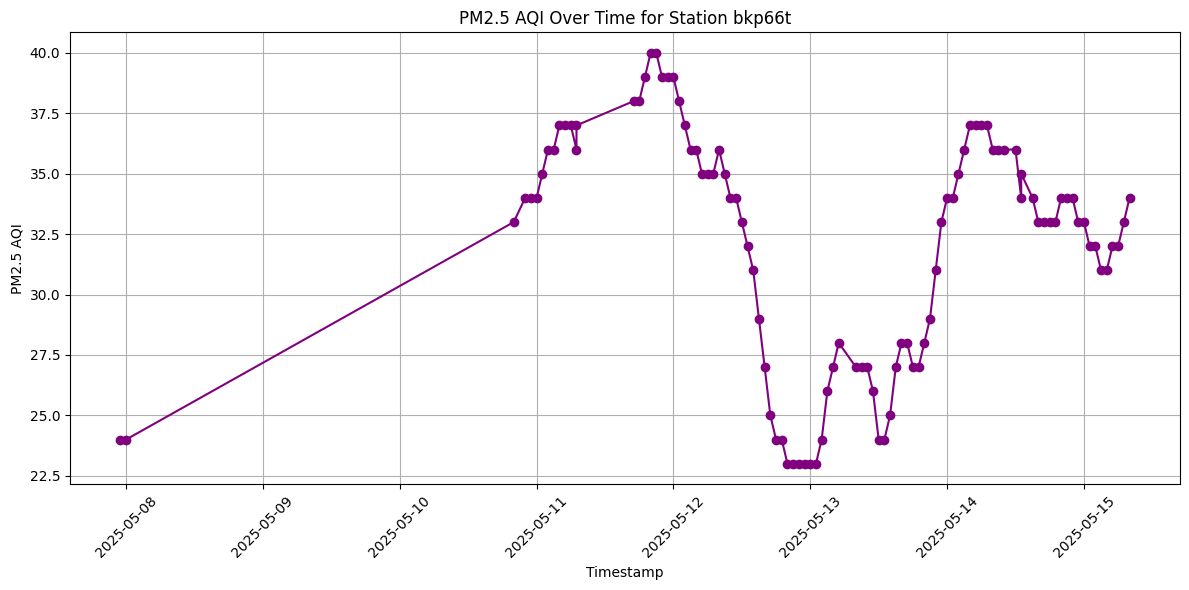

In [20]:
import matplotlib.pyplot as plt
station_id = 'bkp66t'
df_station = df_all[df_all['stationID'] == station_id].sort_values('timestamp')

plt.figure(figsize=(12, 6))
plt.plot(df_station['timestamp'], df_station['PM25.aqi'], marker='o', linestyle='-', color='purple')
plt.title(f'PM2.5 AQI Over Time for Station {station_id}')
plt.xlabel('Timestamp')
plt.ylabel('PM2.5 AQI')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

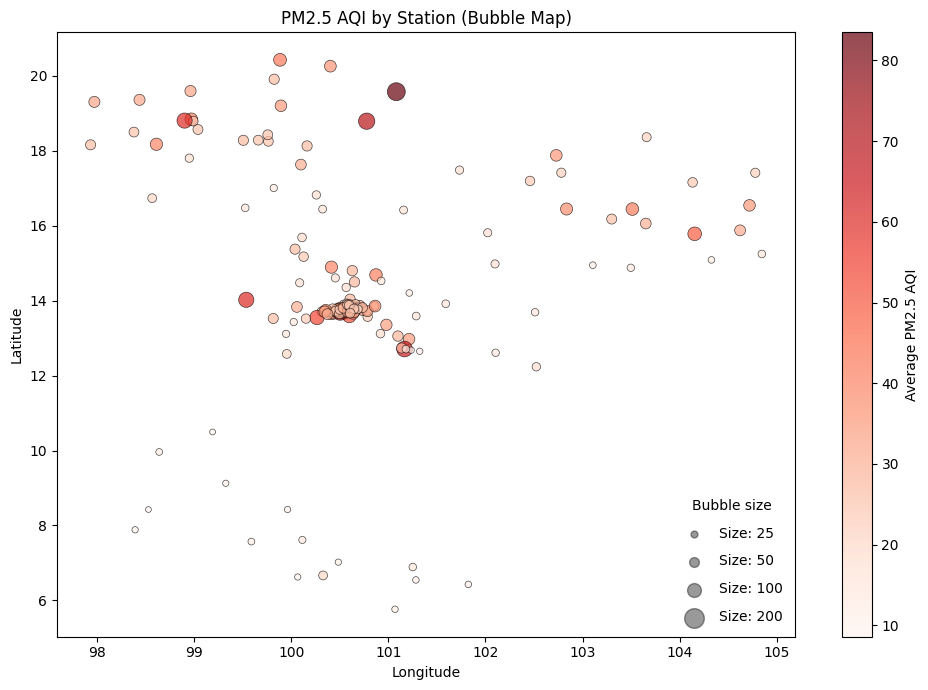

In [21]:
import matplotlib.pyplot as plt

df_bubble = df_all.groupby(['stationID', 'nameTH', 'lat', 'long'], as_index=False)['PM25.aqi'].mean()

lat = df_bubble['lat']
lon = df_bubble['long']
aqi = df_bubble['PM25.aqi']

# ใช้ค่าคงที่เป็นขนาดฟอง หรือ scale จากค่า AQI
bubble_size = aqi * 2  # ปรับสัดส่วนตามความเหมาะสม

# วาดแผนที่
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    lon, lat,
    c=aqi,
    s=bubble_size,
    cmap='Reds',
    alpha=0.7,
    edgecolors='k',
    linewidths=0.5
)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('PM2.5 AQI by Station (Bubble Map)')
cbar = plt.colorbar(scatter)
cbar.set_label('Average PM2.5 AQI')

# Legend ขนาดฟองจำลอง
for size in [25, 50, 100, 200]:
    plt.scatter([], [], c='k', alpha=0.4, s=size,
                label=f'Size: {size}')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Bubble size')

plt.tight_layout()
plt.show()

In [22]:
import plotly.express as px

df_map = df_all.groupby(['stationID', 'nameTH', 'lat', 'long'], as_index=False)['PM25.aqi'].mean()

fig = px.scatter_geo(
    df_map,
    lat='lat',
    lon='long',
    color='PM25.aqi',
    hover_name='nameTH',
    color_continuous_scale='Turbo',
    title='PM2.5 AQI by Station in Thailand',
    projection='natural earth'
)

# ตั้งค่าการแสดงผลให้อยู่ในขอบเขตประเทศไทย
fig.update_geos(
    visible=True,
    resolution=50,
    showcountries=True,
    countrycolor="gray",
    showsubunits=True,
    subunitcolor="lightgray",
    showocean=True,
    oceancolor="LightBlue",
    showland=True,
    landcolor="whitesmoke",
    lakecolor="LightBlue",
    showlakes=True,
    lataxis_range=[5, 21],
    lonaxis_range=[93, 110]
)

fig.update_layout(
    template="plotly_dark",
    margin={"r":0,"t":40,"l":0,"b":0},
    coloraxis_colorbar=dict(title="PM2.5 AQI")
)


fig.show()

In [23]:
area_highest_aqi = df_all.groupby('areaTH')['PM25.aqi'].mean()

In [24]:
area_highest_aqi

areaTH
 ต.มีชัย อ.เมือง, หนองคาย                     35.494845
 ต.ลาดใหญ่ อ.เมือง, สมุทรสงคราม               13.804124
 ต.ในเมือง อ.เมืองชัยภูมิ, ชัยภูมิ            17.453608
ต.กาฬสินธุ์ อ.เมือง, กาฬสินธ์ุ                41.391753
ต.กุดป่อง อ.เมือง, เลย                        17.835052
                                                ...    
แขวงบางนา เขตบางนา, กรุงเทพฯ                  24.525773
แขวงพญาไท เขตพญาไท, กรุงเทพฯ                  17.659794
แขวงพลับพลา เขตวังทองหลาง, กรุงเทพฯ           26.958763
แขวงหิรัญรูจี เขตธนบุรี, กรุงเทพฯ             28.701031
แยกสวนสยาม-รามอินทรา เขตคันนายาว, กรุงเทพฯ    23.220000
Name: PM25.aqi, Length: 187, dtype: float64

In [25]:
from openai import OpenAI
from langchain.prompts import PromptTemplate

typhoon_prompt = PromptTemplate(
    input_variables=["context"],
    template="""
You are an environmental data analyst. Your responsibility is to analyze weather and air pollution data during a given period 
and summarize important insights to help the public or relevant agencies make appropriate policy decisions.
Please prepare the report using the following structure:

{context}

📌 Executive Summary
   • Present the overall air quality and weather situation.
   • Identify key indices (temperature, PM2.5, humidity, wind speed) and compare them to standard values.
   • Highlight critical areas and time periods that need special attention.

🔍 Key Insights
   • Analyze relationships between various variables affecting air quality.
   • Identify unusual patterns or trends and explain possible causes.
   • Link the data to human activities or natural phenomena.

⚠️ Policy Recommendations
   • Short-term measures to respond to the current situation.
   • Recommendations for vulnerable populations (children, elderly, people with chronic diseases).
   • Long-term structural measures to solve the problem.

📈 Trend Forecast
   • Forecast the air quality situation over the next 5 days.
   • Identify factors that may affect future changes.
"""
)

# # Example prompt output structure:
# """
# 📌 Executive Summary:
# The weather and air quality data from May 1–7, 2025, shows that the average temperature was 33°C, peaking at 36°C in the afternoon of May 3.
# The average PM2.5 level throughout the week was 60 µg/m³, which exceeds the WHO standard. Additionally, low wind speed (under 5 km/h) 
# in the morning led to a build-up of particulate matter in the air, especially in urban and industrial areas. The average relative humidity was 65%, 
# dropping to 45% during the daytime, which may have contributed to the deterioration of air quality.

# 🔍 Key Insights:
# - PM2.5 levels peaked between 11:00 and 13:00, aligning with high temperatures and low wind.
# - There’s a trend of worsening air quality in the afternoons due to weather conditions.
# - Low daytime humidity might be a contributing factor to higher PM2.5 concentrations.

# ⚠️ Recommendations:
# - Avoid outdoor exercise between 10:00 and 15:00.
# - Vulnerable groups should wear masks and stay indoors in enclosed environments.
# """


In [26]:
typhoon_token = "sk-Rl48oPMyO4lVARDGidyzc8tZLBQQxzNdxtXFQWJrDxJOx1j8"

# Initialize the Typhoon client
client = OpenAI(
    api_key= typhoon_token,
    base_url='https://api.opentyphoon.ai/v1'
)

# Define a function to generate a response using the LLM
def generate_response(context, typhoon_prompt):
    system_prompt=typhoon_prompt.format(context=context)
    chat_completion = client.chat.completions.create(
        model="typhoon-v2-70b-instruct",
        messages=[{"role": "user", "content": system_prompt}],
        max_tokens=2048,
        temperature=0.7,
    )
    return chat_completion.choices[0].message.content

In [27]:
ans = generate_response(df_all, typhoon_prompt)
print(ans)

**Executive Summary**

The air quality and weather situation in Thailand during the analyzed period shows moderate levels of PM2.5, with an average concentration of 43.5 μg/m³. This value is slightly above the World Health Organization's (WHO) guideline of 25 μg/m³. The temperature ranged from 24°C to 34°C, which is within the normal range for this region. Humidity levels were relatively high, averaging 70%, while wind speeds were generally low, averaging 2 m/s.

Key indices such as PM2.5, temperature, humidity, and wind speed were compared to standard values. PM2.5 concentrations exceeded the WHO guidelines in several areas, particularly in urban regions like Bangkok. Temperature and humidity levels were within the expected ranges, but wind speeds were lower than usual, which may contribute to poor air quality.

Critical areas that need special attention include Bangkok, where PM2.5 concentrations were consistently higher than the WHO guidelines. Time periods with high PM2.5 levels we

# Create SCHEMA.md for AQI Data

In [28]:
dtype_mapping = {
    'object': 'TEXT',
    'string': 'TEXT',
    'int64': 'INTEGER',
    'int32': 'INTEGER',
    'float64': 'REAL',
    'float32': 'REAL',
    'datetime64[ns]': 'TEXT',
    'bool': 'BOOLEAN'
}


columns = df_all.columns.tolist()
types = [str(df_all[col].dtype) for col in columns]

key_columns = [col for col in df_all.columns if df_all[col].isnull().sum() == 0]

schema = {
    "columns": columns,
    "types": types,
    "key_columns": key_columns
}

print(json.dumps(schema, indent=4, ensure_ascii=False))

{
    "columns": [
        "timestamp",
        "stationID",
        "nameTH",
        "nameEN",
        "areaTH",
        "areaEN",
        "stationType",
        "lat",
        "long",
        "PM25.color_id",
        "PM25.aqi",
        "year",
        "month",
        "day",
        "hour"
    ],
    "types": [
        "datetime64[ns]",
        "string",
        "string",
        "string",
        "string",
        "string",
        "string",
        "float64",
        "float64",
        "int64",
        "float64",
        "int64",
        "int64",
        "int32",
        "int32"
    ],
    "key_columns": [
        "timestamp",
        "stationID",
        "nameTH",
        "nameEN",
        "areaTH",
        "areaEN",
        "stationType",
        "lat",
        "long",
        "PM25.color_id",
        "PM25.aqi",
        "year",
        "month",
        "day",
        "hour"
    ]
}


In [29]:
with open('SCHEMA.md', 'w', encoding='utf-8') as f:
    json.dump(schema, f, indent=4, ensure_ascii=False)